<a href="https://colab.research.google.com/github/bhadaur1/Chollet/blob/master/Chollet_Chap3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Multiclass classification using Reuters dataset

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
1000/len(train_data)

0.11133377866844801

In [5]:
def decode_line(train_data, lineno=0):
  word_index = reuters.get_word_index()
  reverse_word_index = {value: key for key, value in word_index.items()}
  return " ".join([reverse_word_index.get(i-3, "?") for i in train_data[lineno]])

decode_line(train_data, -1)

557056/550378 [==============================] - 0s 0us/step


"? currency fluctuations may ? their influence on the bullion market in the near future bullion bankers samuel montagu and co ltd said in a market report but the firm said silver may lag behind gold in any reactions to movements on foreign exchanges opec's failure to address the recent decline in oil prices remains a worrying factor however and on balance it appears that the market should be approached cautiously montagu said the bank said the us economy has shown no ? long term improvement and that both latin american debt and the iranian arms affair could undermine confidence in the dollar reuter 3"

In [6]:
def vectorize_data(train_data, train_labels, test_data, test_labels, dimension = 10000):

  def vectorize_sequences(sequences, dimension = dimension):
    one_hot_encoded = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
      one_hot_encoded[i, sequences[i]] = 1
    return one_hot_encoded

  x_train = vectorize_sequences(train_data)
  y_train = train_labels.astype('int')

  x_test = vectorize_sequences(test_data)
  y_test = test_labels.astype('int')

  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = vectorize_data(train_data, train_labels, test_data, test_labels)

In [15]:
%%time
def model_training(epochs=1):
  from keras import models, layers
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(46, activation='softmax'))

  model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  history = model.fit(x_train, y_train, epochs=epochs, batch_size=512, validation_split=0.111)
  results = model.evaluate(x_test, y_test)
  return model, history, results

model, history, test_eval_results = model_training(8)

Epoch 1/8
16/16 [==============================] - 0s 20ms/step - loss: 2.6074 - accuracy: 0.4622 - val_loss: 1.8082 - val_accuracy: 0.6483
Epoch 2/8
16/16 [==============================] - 0s 13ms/step - loss: 1.4279 - accuracy: 0.7058 - val_loss: 1.3823 - val_accuracy: 0.7114
Epoch 3/8
16/16 [==============================] - 0s 13ms/step - loss: 1.0537 - accuracy: 0.7751 - val_loss: 1.2072 - val_accuracy: 0.7425
Epoch 4/8
16/16 [==============================] - 0s 13ms/step - loss: 0.8216 - accuracy: 0.8314 - val_loss: 1.1142 - val_accuracy: 0.7585
Epoch 5/8
16/16 [==============================] - 0s 14ms/step - loss: 0.6617 - accuracy: 0.8632 - val_loss: 1.0617 - val_accuracy: 0.7735
Epoch 6/8
16/16 [==============================] - 0s 13ms/step - loss: 0.5226 - accuracy: 0.8923 - val_loss: 1.0299 - val_accuracy: 0.7926
Epoch 7/8
16/16 [==============================] - 0s 13ms/step - loss: 0.4224 - accuracy: 0.9118 - val_loss: 1.0104 - val_accuracy: 0.8006
Epoch 8/8
71/71 [===

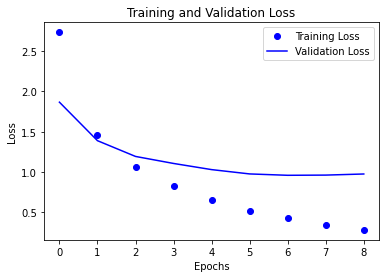

In [12]:
def plot_loss(history):

  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = history.epoch

  plt.plot(epochs, loss_values, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_loss(history)


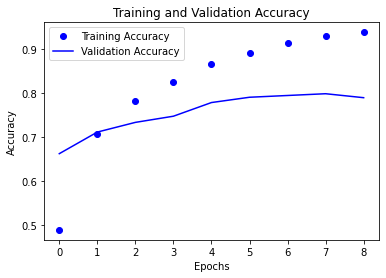

In [13]:
def plot_accuracy(history):
  history_dict = history.history
  accuracy = history_dict['accuracy']
  val_accuracy_values = history_dict['val_accuracy']
  epochs = history.epoch
  plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
  plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

plot_accuracy(history)

In [16]:
test_eval_results

[0.9512143731117249, 0.790739119052887]

In [19]:
predictions = model.predict(x_test)

In [20]:
predictions.shape

(2246, 46)

In [21]:
predictions_class = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [28]:
predictions_class

array([ 3, 10,  1, ...,  3,  4,  1])

In [29]:
np.all(np.argmax(model.predict(x_test), axis=-1) == predictions_class)

True